clustering

In [ ]:
import numpy as np
np.random.seed(42)
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


tag_features = movie_features.drop(columns=['movieId', 'title'], errors='ignore')

# Normalizing
scaler = StandardScaler()
scaled_features = scaler.fit_transform(tag_features)

# KMeans algorithm for clustering
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

movie_features['cluster'] = clusters


In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Viewing a few movies from each cluster
for i in range(k):
    print(f"\n Cluster {i}:")
    print(movie_features[movie_features['cluster'] == i]['title'].head(6).to_string(index=False))



 Cluster 0:
                      Sense and Sensibility (1995)
                                    Othello (1995)
                                 Persuasion (1995)
Shanghai Triad (Yao a yao yao dao waipo qiao) (...
                                 Carrington (1995)
                   Cry, the Beloved Country (1995)

 Cluster 1:
                                       Heat (1995)
                                     Casino (1995)
                                 Four Rooms (1995)
                                 Get Shorty (1995)
                          Leaving Las Vegas (1995)
City of Lost Children, The (Cité des enfants pe...

 Cluster 2:
           Grumpier Old Men (1995)
          Waiting to Exhale (1995)
Father of the Bride Part II (1995)
                    Sabrina (1995)
               Tom and Huck (1995)
               Sudden Death (1995)

 Cluster 3:
   American President, The (1995)
                     Nixon (1995)
          Dead Man Walking (1995)
               Richard I

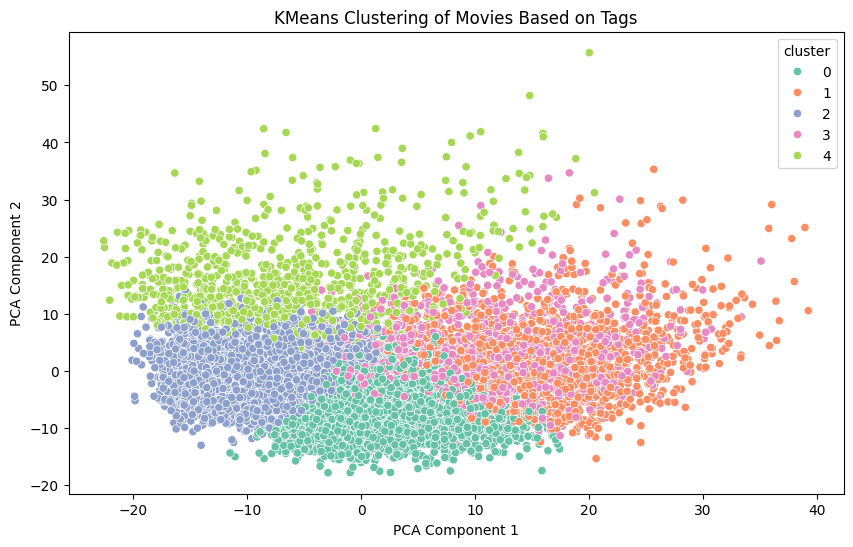

In [ ]:
# Reducing tag matrix to 2D using PCA for plotting
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

# Plotting clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=reduced_features[:, 0],
    y=reduced_features[:, 1],
    hue=movie_features['cluster'],
    palette='Set2',
    legend='full'
)
plt.title("KMeans Clustering of Movies Based on Tags")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


EDA analysis

1

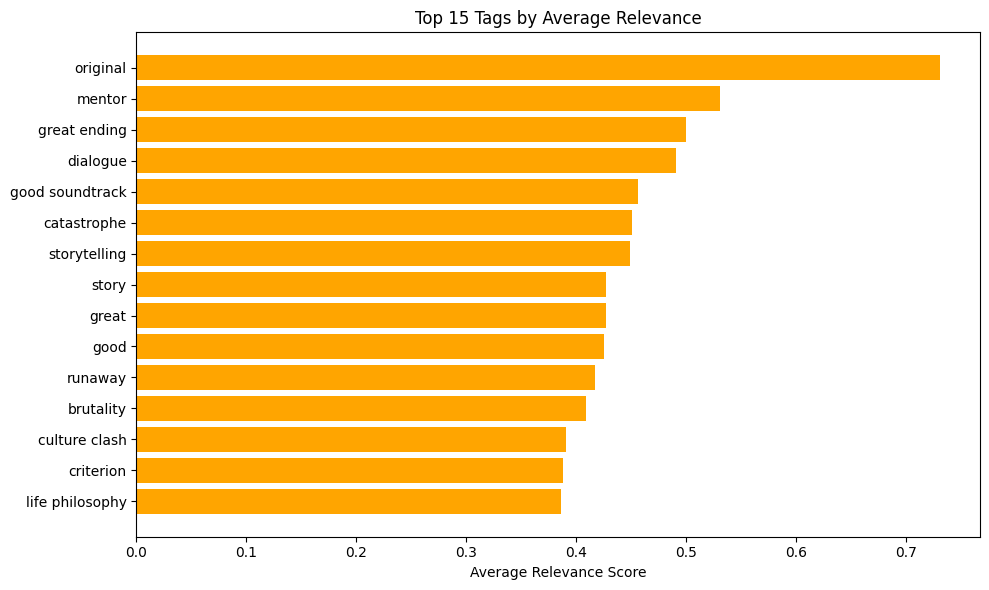

In [ ]:
# Average relevance of each tag
avg_tag_scores = genome_scores.groupby('tagId')['relevance'].mean().sort_values(ascending=False)

# Map tagId to tag name
tag_mapping = genome_tags.set_index('tagId')['tag'].to_dict()
top_tags = [(tag_mapping[i], score) for i, score in avg_tag_scores.head(15).items()]

# Plot
tags, scores = zip(*top_tags)
plt.figure(figsize=(10,6))
plt.barh(tags[::-1], scores[::-1], color='orange')
plt.title("Top 15 Tags by Average Relevance")
plt.xlabel("Average Relevance Score")
plt.tight_layout()
plt.show()


/tmp/ipython-input-45-2140137127.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cluster', data=movie_features, palette='Set2')


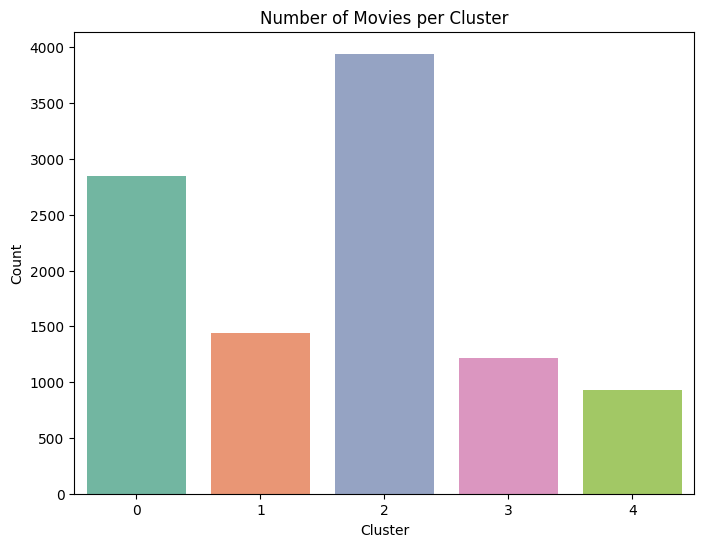

In [ ]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.countplot(x='cluster', data=movie_features, palette='Set2')
plt.title("Number of Movies per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()


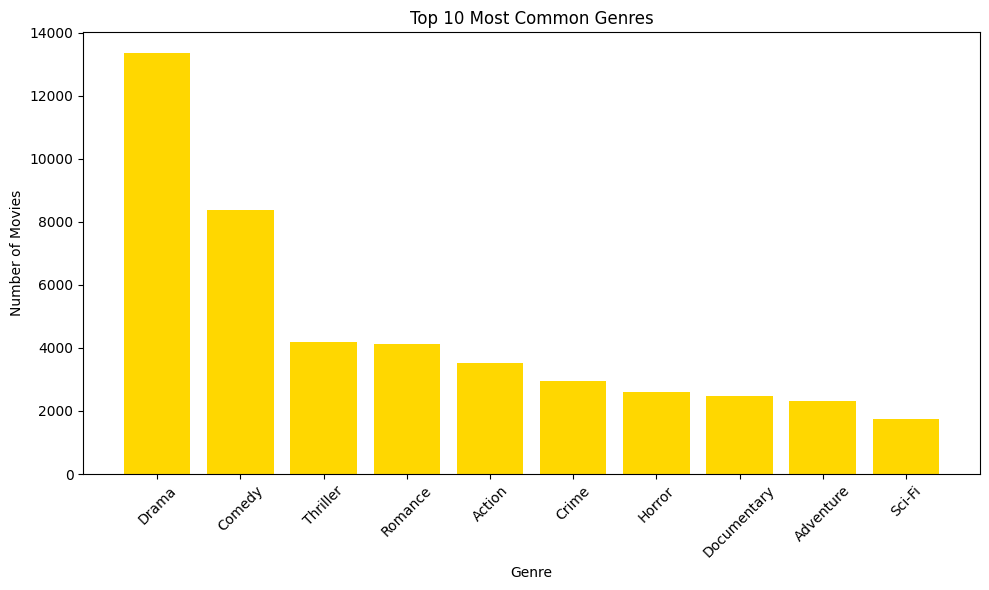

In [ ]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Drop NaN and split genres
genre_list = movies['genres'].dropna().str.split('|')
flat_genres = [genre for sublist in genre_list for genre in sublist]

# Count genres
genre_counts = Counter(flat_genres)

# Plot
plt.figure(figsize=(10,6))
plt.bar(*zip(*genre_counts.most_common(10)), color='gold')
plt.title("Top 10 Most Common Genres")
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
